## Simple Portfolio Optimization using Python - Efficient Frontier


In [22]:
#Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
#Downloading Historical Data (Magnificent 7)
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META']
data = yf.download(tickers, start='2019-01-01', end='2024-01-01')
returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  7 of 7 completed


In [3]:
#Expected Returns and Covariance Matrix
expected_returns = returns.mean()
covariance_matrix = returns.cov()
num_assets = len(tickers)

In [4]:
#Portfolio Performance Function
def portfolio_performance(weights, returns, covariance_matrix):
    portfolio_return = np.sum(returns * weights) * 252  # Annualize returns
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix * 252, weights)))  # Annualize risk
    return portfolio_return, portfolio_risk

In [16]:
#Generating Random Portfolios
num_portfolios = 100000
results = np.zeros((num_portfolios, 3))
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize weights
    portfolio_return, portfolio_risk = portfolio_performance(weights, expected_returns, covariance_matrix)
    results[i, 0] = portfolio_return
    results[i, 1] = portfolio_risk
    results[i, 2] = results[i, 0] / results[i, 1]  # Sharpe ratio (assuming risk-free rate = 0)

### Efficient Frontier 

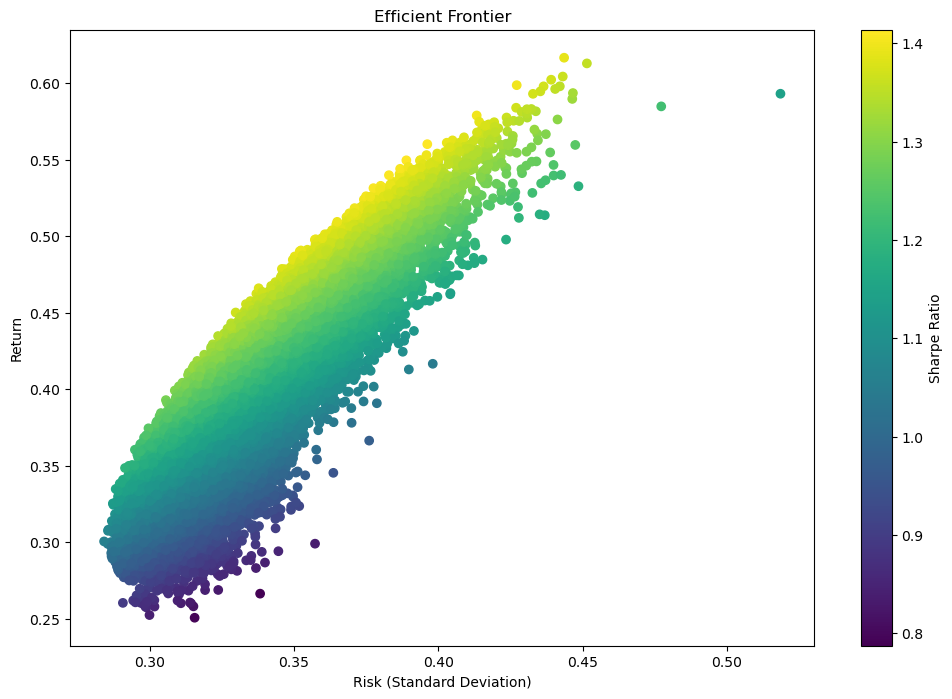

In [17]:
#Plot Efficient Frontier
plt.figure(figsize=(12, 8))
plt.scatter(results[:, 1], results[:, 0], c=results[:, 2], cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()

### Maximum Sharpe Ratio Portfolio (Tangency) 

Max Sharpe Portfolio Return: 0.5601335174582007
Max Sharpe Portfolio Risk: 0.39618613594153135
Max Sharpe Portfolio Sharpe Ratio: 1.413814029930781


Text(0.39618613594153135, 0.5601335174582007, 'Max Sharpe\nRatio: 1.41')

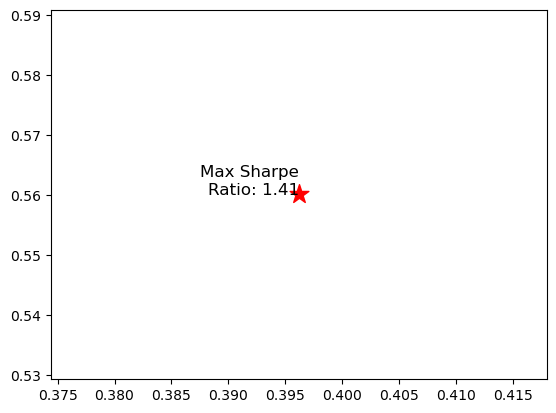

In [18]:
#portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[:, 2])
max_sharpe_return = results[max_sharpe_idx, 0]
max_sharpe_risk = results[max_sharpe_idx, 1]
max_sharpe_ratio = results[max_sharpe_idx, 2]

# Print the portfolio performance
print(f"Max Sharpe Portfolio Return: {max_sharpe_return}")
print(f"Max Sharpe Portfolio Risk: {max_sharpe_risk}")
print(f"Max Sharpe Portfolio Sharpe Ratio: {max_sharpe_ratio}")

plt.scatter(max_sharpe_risk, max_sharpe_return, color='red', marker='*', s=200)  # Marking the maximum Sharpe ratio portfolio
plt.text(max_sharpe_risk, max_sharpe_return, f"Max Sharpe\nRatio: {max_sharpe_ratio:.2f}", fontsize=12, ha='right')

In [19]:
# Extract the weights for the maximum Sharpe ratio portfolio
max_sharpe_weights = np.random.random(num_assets)
max_sharpe_weights = max_sharpe_weights / np.sum(max_sharpe_weights)

In [20]:
# Total amount to invest
total_investment = 100000  # $100,000

# Amount to invest in each stock
investment_per_stock = max_sharpe_weights * total_investment

# Printing the results
for i, ticker in enumerate(tickers):
    print(f"Invest ${investment_per_stock[i]:.2f} in {ticker}")

Invest $11256.91 in AAPL
Invest $21289.12 in MSFT
Invest $27432.81 in GOOG
Invest $571.14 in AMZN
Invest $26239.38 in NVDA
Invest $8254.12 in TSLA
Invest $4956.53 in META


In [21]:
print("Maximum Sharpe Ratio Portfolio")
print(f"Sharpe Ratio: {max_sharpe_ratio:.2f}")
print(f"Expected Annual Return: {max_sharpe_return:.2f}")
print(f"Annualized Risk (Standard Deviation): {max_sharpe_risk:.2f}")
print(f"Optimal Weights: {max_sharpe_weights}")

print("\nInvestment Allocation:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {max_sharpe_weights[i]:.2%} ({investment_per_stock[i]:.2f})")

Maximum Sharpe Ratio Portfolio
Sharpe Ratio: 1.41
Expected Annual Return: 0.56
Annualized Risk (Standard Deviation): 0.40
Optimal Weights: [0.1125691  0.21289123 0.27432807 0.00571137 0.26239377 0.08254115
 0.04956531]

Investment Allocation:
AAPL: 11.26% (11256.91)
MSFT: 21.29% (21289.12)
GOOG: 27.43% (27432.81)
AMZN: 0.57% (571.14)
NVDA: 26.24% (26239.38)
TSLA: 8.25% (8254.12)
META: 4.96% (4956.53)


### Minimum variance portfolio 

Text(0.28621357598766545, 0.2970134793274086, 'Min Variance')

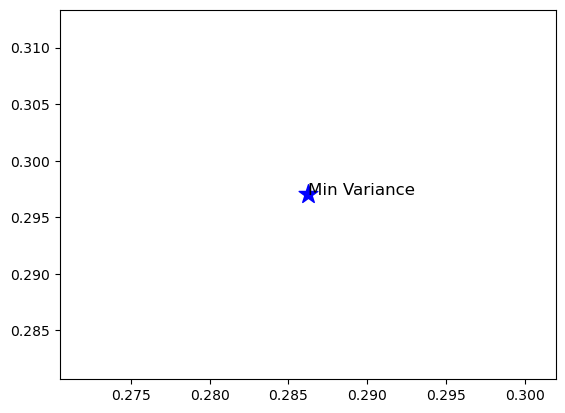

In [11]:
# Find the portfolio with the minimum risk
min_risk_idx = np.argmin(results[:, 1])
min_risk_return = results[min_risk_idx, 0]
min_risk_risk = results[min_risk_idx, 1]

plt.scatter(min_risk_risk, min_risk_return, color='blue', marker='*', s=200)  # Marking the minimum variance portfolio
plt.text(min_risk_risk, min_risk_return, "Min Variance", fontsize=12, ha='left')


In [13]:
# Extract the weights for the minimum variance portfolio
min_variance_weights = np.random.random(num_assets)
min_variance_weights = min_variance_weights / np.sum(min_variance_weights)

In [14]:
# Total amount to invest
total_investment = 100000  # Example: $100,000

# Amount to invest in each stock
investment_per_stock_min_variance = min_variance_weights * total_investment

# Printing the results
for i, ticker in enumerate(tickers):
    print(f"Invest ${investment_per_stock_min_variance[i]:.2f} in {ticker}")


Invest $7688.15 in AAPL
Invest $14534.85 in MSFT
Invest $15170.24 in GOOG
Invest $5026.37 in AMZN
Invest $18414.31 in NVDA
Invest $15640.34 in TSLA
Invest $23525.75 in META


In [15]:
print("Minimum Variance Portfolio")
print(f"Expected Annual Return: {min_risk_return:.2f}")
print(f"Annualized Risk (Standard Deviation): {min_risk_risk:.2f}")
print(f"Optimal Weights: {min_variance_weights}")

print("\nInvestment Allocation:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {min_variance_weights[i]:.2%} ({investment_per_stock_min_variance[i]:.2f})")

Minimum Variance Portfolio
Expected Annual Return: 0.30
Annualized Risk (Standard Deviation): 0.29
Optimal Weights: [0.07688147 0.14534848 0.15170238 0.05026365 0.18414313 0.15640335
 0.23525753]

Investment Allocation:
AAPL: 7.69% (7688.15)
MSFT: 14.53% (14534.85)
GOOG: 15.17% (15170.24)
AMZN: 5.03% (5026.37)
NVDA: 18.41% (18414.31)
TSLA: 15.64% (15640.34)
META: 23.53% (23525.75)


### Diversification benefits 

In [23]:
# Calculate the correlation matrix of stock returns
correlation_matrix = returns.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Ticker      AAPL      AMZN      GOOG      META      MSFT      NVDA      TSLA
Ticker                                                                      
AAPL    1.000000  0.619210  0.672954  0.591974  0.758621  0.657635  0.488406
AMZN    0.619210  1.000000  0.663016  0.613559  0.682968  0.602716  0.438261
GOOG    0.672954  0.663016  1.000000  0.671567  0.754472  0.624816  0.407921
META    0.591974  0.613559  0.671567  1.000000  0.620069  0.551755  0.352535
MSFT    0.758621  0.682968  0.754472  0.620069  1.000000  0.707201  0.453118
NVDA    0.657635  0.602716  0.624816  0.551755  0.707201  1.000000  0.501439
TSLA    0.488406  0.438261  0.407921  0.352535  0.453118  0.501439  1.000000


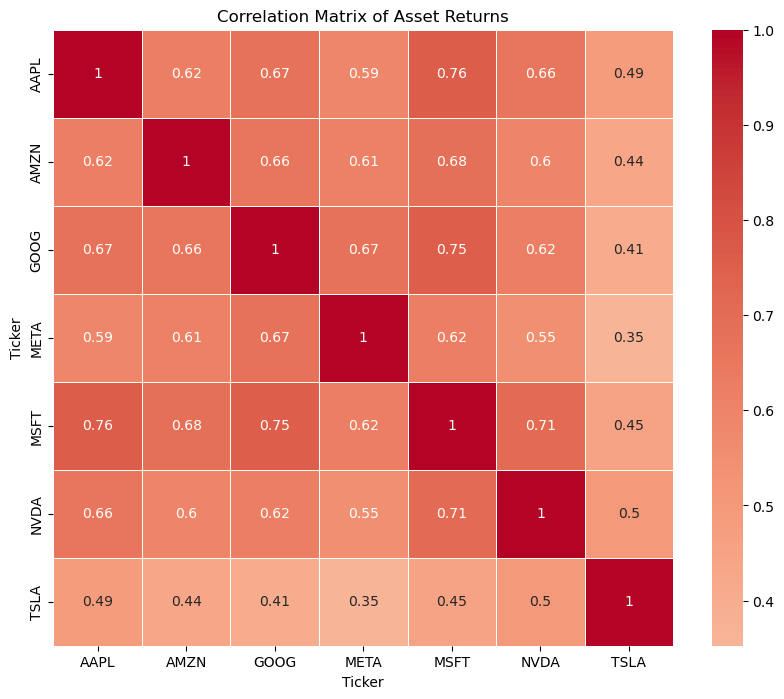

In [24]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix of Asset Returns')
plt.show()